In [75]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
from IPython.display import display # Allows the use of display() for DataFrames...standard in python 3

# save model for future use
from sklearn.externals import joblib
from sklearn.externals.joblib import dump
from sklearn.preprocessing import MaxAbsScaler
from sklearn.externals.joblib import load
from scipy.stats import boxcox
from scipy import stats
from scipy.stats import norm, skew
from mlxtend.regressor import StackingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import chi2
from time import time
from collections import defaultdict, deque
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures

#from keras.layers import Input
#from keras.models import Model
import os
#from keras.layers.core import Dense
#from keras.models import Sequential
#from keras.layers import Dropout, BatchNormalization
#from keras.wrappers.scikit_learn import KerasRegressor

# Common imports
import numpy as np
import os
import pandas as pd
# Import seaborn
import seaborn as sns

# Import matplotlib
import matplotlib.pyplot as plt


# to make this notebook's output stable across runs

np.random.seed(42)

# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score, precision_score, recall_score
from random import seed, randint
from sklearn.metrics import f1_score
from scipy.stats import randint

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
import random
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from random import seed, randint
from sklearn.metrics import f1_score
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import StratifiedKFold 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Imputer 
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix, recall_score

In [2]:
# this class is used to help with the pipeline.  
# More details on this class can found in chapter 2 of Hands-on Machine Learning with Scikit-Learn and Tensorflow
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [3]:
#Assumptions
my_imputer = Imputer()
num_folds = 3
scoring = 'neg_mean_absolute_error'
seed = 7
numpy.random.seed(seed)
trees = 10
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
scaler = MinMaxScaler(feature_range=(0, 1))
depth = 5
start = True
pca = PCA(n_components=0.8)
skb = SelectKBest(k=23)
features = []
features.append(('pca', pca))
features.append(('select_best', skb))
feature_union = FeatureUnion(features)

#algorithms
LR_clf = LinearRegression()
Ridge_clf = Ridge()
LASSO_clf = Lasso()
KNN_clf = KNeighborsRegressor()
RF_clf = RandomForestRegressor(random_state = 7)
GB_clf = GradientBoostingRegressor(random_state = 7, n_estimators= trees, max_depth = depth, warm_start = start)
RF_clf_tuned = RandomForestRegressor(random_state = 7, n_estimators= 189, max_depth = 3, 
                                     min_samples_split = 2 )
KNN_clf_tuned = KNeighborsRegressor(n_neighbors = 9)
LASSO_clf_tuned = Lasso(alpha = 0.8)
GB_clf_tuned = GradientBoostingRegressor(random_state = 7, max_depth = 2, n_estimators = 125 )

'''
# Keras NN
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(128, input_dim=6, activation='relu', kernel_initializer="glorot_uniform"))
    model.add(Dropout(.25))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(.25))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])   
    return model
keras_clf = KerasRegressor(build_fn=baseline_model, epochs=4, batch_size=5, verbose=0)
'''
stregr_clf = StackingRegressor(regressors=[RF_clf_tuned, LASSO_clf_tuned], 
                           meta_regressor=GB_clf_tuned)

In [4]:
train_df_2016 = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])

In [5]:
properties_2016_df = pd.read_csv("properties_2016.csv")

C:\Users\203014767\.conda\envs\DAND\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
train_df_2016 = pd.merge(train_df_2016, properties_2016_df, on='parcelid', how='left')

In [7]:
print(len(train_df_2016))

90275


In [8]:
train_df_2017 = pd.read_csv("train_2017.csv", parse_dates=["transactiondate"])

In [9]:
properties_2017_df = pd.read_csv("properties_2017.csv")

C:\Users\203014767\.conda\envs\DAND\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
train_df_2017 = pd.merge(train_df_2017, properties_2017_df, on='parcelid', how='left')

In [11]:
print(len(train_df_2017))

77613


In [12]:
frames = [train_df_2016, train_df_2017]

train_df = pd.concat(frames)

In [13]:
print(len(train_df))

167888


In [14]:
test_df = pd.read_csv("sample_submission.csv")

In [15]:
print(len(test_df))

2985217


In [16]:
test_df = test_df.rename(columns={"ParcelId": 'parcelid'})

In [17]:
print(len(test_df))

2985217


In [18]:
del train_df_2016, train_df_2017 # dfs still in list
del frames   # memory release now

In [19]:
import gc
gc.collect()

35

frames = [properties_2016_df, properties_2017_df]
properties = pd.concat(frames)

In [20]:
#test_df = pd.merge(test_df, properties, on='parcelid', how='left')
#test_df_2016 = pd.merge(test_df, properties_2016_df, on='parcelid', how='left')
test_df = pd.merge(test_df, properties_2016_df, on='parcelid', how='left')

In [21]:
print(len(test_df))

2985217


In [22]:
del properties_2016_df, properties_2017_df # dfs still in list
  # memory release now
gc.collect()

28

In [23]:
train_df_na = (train_df.isnull().sum() / len(train_df)) * 100
train_df_na = train_df_na.drop(train_df_na[train_df_na == 0].index).sort_values(ascending=False)
NA_data = pd.DataFrame({'NA_percent' :train_df_na})
NA_data_remove = NA_data[NA_data.NA_percent >= 15]
NA_data_remove

,NA_percent
buildingclasstypeid,99.981535
finishedsquarefeet13,99.955327
basementsqft,99.944606
storytypeid,99.944606
yardbuildingsqft26,99.901720
fireplaceflag,99.765320
architecturalstyletypeid,99.721243
typeconstructiontypeid,99.689078
finishedsquarefeet6,99.519322
decktypeid,99.242352


In [24]:
test_df_na = (test_df.isnull().sum() / len(test_df)) * 100
test_df_na = test_df_na.drop(test_df_na[test_df_na == 0].index).sort_values(ascending=False)
NA_data_test = pd.DataFrame({'NA_percent' :test_df_na})
NA_data_remove_test = NA_data_test[NA_data_test.NA_percent >= 15]
NA_data_remove_test

,NA_percent
storytypeid,99.945599
basementsqft,99.945465
yardbuildingsqft26,99.911330
fireplaceflag,99.827048
architecturalstyletypeid,99.796966
typeconstructiontypeid,99.773986
finishedsquarefeet13,99.743000
buildingclasstypeid,99.576949
decktypeid,99.427311
finishedsquarefeet6,99.263002


In [25]:
columns_to_remove = []
columns_to_remove = NA_data_remove.index.values.tolist()

In [26]:
data_cleaner = [train_df, test_df]

###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in data_cleaner:    
    dataset.drop(columns_to_remove, axis=1, inplace = True)

In [27]:
# We use it as our only way to select categorical columns here. This is convenient, though
# a little arbitrary.
high_cardinality_cols = [cname for cname in train_df.columns if 
                                train_df[cname].nunique() >= 15 and
                                train_df[cname].dtype == "object"]

low_cardinality_cols = [cname for cname in train_df.columns if 
                                train_df[cname].nunique() < 15 and
                                train_df[cname].dtype == "object"]
numeric_cols = [cname for cname in train_df.columns if 
                                train_df[cname].dtype in ['int64', 'float64']]

my_cols = low_cardinality_cols + numeric_cols
high_cardinality_cols
#train_predictors = candidate_train_predictors[my_cols]
#test_predictors = candidate_test_predictors[my_cols]
#https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding

['propertycountylandusecode']

In [28]:
train_df[high_cardinality_cols].nunique()

propertycountylandusecode    90
dtype: int64

In [29]:
for dataset in data_cleaner:    
    dataset.drop(high_cardinality_cols, axis=1, inplace = True)

In [30]:
train_df.apply(lambda x: len(x.unique()))

parcelid                        165210
logerror                         78958
transactiondate                    616
bathroomcnt                         26
bedroomcnt                          18
calculatedbathnbr                   25
calculatedfinishedsquarefeet      5826
finishedsquarefeet12              5730
fips                                 4
fullbathcnt                         17
latitude                        126380
longitude                       126313
lotsizesquarefeet                25368
propertylandusetypeid               15
rawcensustractandblock           57812
regionidcity                       179
regionidcounty                       4
regionidzip                        391
roomcnt                             18
yearbuilt                          139
structuretaxvaluedollarcnt       96513
taxvaluedollarcnt               102171
assessmentyear                       3
landtaxvaluedollarcnt           102190
taxamount                       149916
censustractandblock      

In [31]:
# More categorical high cardinality columns to drop.  
more_columns_to_drop = ['parcelid',
                        'censustractandblock', 'rawcensustractandblock',
                        'latitude','longitude','regionidcounty', 'assessmentyear']
for dataset in data_cleaner:    
    dataset.drop(more_columns_to_drop, axis=1, inplace = True)

train_df['visitors'], lam = boxcox(train_df['visitors'])
print('Lambda: %f' % lam)
#print(train_df)
#pyplot.figure(1)

In [32]:
drop_column2 = ['transactiondate'] 
train_df.drop(drop_column2, axis=1, inplace = True)

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 18 columns):
logerror                        167888 non-null float64
bathroomcnt                     167854 non-null float64
bedroomcnt                      167854 non-null float64
calculatedbathnbr               166056 non-null float64
calculatedfinishedsquarefeet    166992 non-null float64
finishedsquarefeet12            159519 non-null float64
fips                            167854 non-null float64
fullbathcnt                     166056 non-null float64
lotsizesquarefeet               149446 non-null float64
propertylandusetypeid           167854 non-null float64
regionidcity                    164579 non-null float64
regionidzip                     167769 non-null float64
roomcnt                         167854 non-null float64
yearbuilt                       166828 non-null float64
structuretaxvaluedollarcnt      167359 non-null float64
taxvaluedollarcnt               167852 non-null fl

In [34]:
# Create a Y value to predict for our training set
y = train_df['logerror'].values

In [35]:
train_df['propertylandusetypeid'] = train_df['propertylandusetypeid'].astype(str)
train_df['propertylandusetypeid']= train_df['propertylandusetypeid'].fillna('')
# Test
test_df['propertylandusetypeid'] = test_df['propertylandusetypeid'].astype(str)
test_df['propertylandusetypeid']= test_df['propertylandusetypeid'].fillna('')


In [36]:
# We will use this for a constant in binning to prevent overfitting
train_df['random_laplace_constant'] = np.random.laplace(loc=0.1, scale=0.1, size= train_df.shape[0])
test_df['random_laplace_constant'] = np.random.laplace(loc=0.1, scale=0.1, size= test_df.shape[0])

In [37]:
print(train_df.describe())

            logerror    bathroomcnt     bedroomcnt  calculatedbathnbr  \
count  167888.000000  167854.000000  167854.000000      166056.000000   
mean        0.013906       2.288265       3.041739           2.312542   
std         0.165706       1.000835       1.149134           0.977808   
min        -4.655420       0.000000       0.000000           1.000000   
25%        -0.025300       2.000000       2.000000           2.000000   
50%         0.006000       2.000000       3.000000           2.000000   
75%         0.039200       3.000000       4.000000           3.000000   
max         5.262999      20.000000      16.000000          20.000000   

       calculatedfinishedsquarefeet  finishedsquarefeet12           fips  \
count                 166992.000000         159519.000000  167854.000000   
mean                    1778.630246           1752.326939    6048.844484   
std                      940.356025            921.360898      20.702187   
min                        2.000000   

## One-Hot Encoding : The Standard Approach for Categorical Data¶
One hot encoding is the most widespread approach, and it works very well unless your categorical variable takes on a large number of values (i.e. you generally won't it for variables taking more than 15 different values. It'd be a poor choice in some cases with fewer values, though that varies.)
One-hot encoding usually helps, but it varies on a case-by-case basis. In this case, there doesn't appear to be any meaningful benefit from using the one-hot encoded variables.

#https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding


Applying to Multiple Files
So far, you've one-hot-encoded your training data. What about when you have multiple files (e.g. a test dataset, or some other data that you'd like to make predictions for)? Scikit-learn is sensitive to the ordering of columns, so if the training dataset and test datasets get misaligned, your results will be nonsense. This could happen if a categorical had a different number of values in the training data vs the test data.

Ensure the test data is encoded in the same manner as the training data with the align command:

Assessment year seems to be primarily 2015 or 2016 with little variance so we will drop it.

In [38]:
train_df['regionidcity'] = train_df['regionidcity'].fillna(train_df['regionidcity'].median())
train_df['yearbuilt'] = train_df['yearbuilt'].fillna(train_df['yearbuilt'].median())
train_df['calculatedfinishedsquarefeet'] = train_df['calculatedfinishedsquarefeet'].fillna(train_df['calculatedfinishedsquarefeet'].mean())
train_df['lotsizesquarefeet'] = train_df['lotsizesquarefeet'].fillna(train_df['lotsizesquarefeet'].mean())
# Test
test_df['regionidcity'] = test_df['regionidcity'].fillna(test_df['regionidcity'].median())
test_df['yearbuilt'] = test_df['yearbuilt'].fillna(test_df['yearbuilt'].median())
test_df['calculatedfinishedsquarefeet'] = test_df['calculatedfinishedsquarefeet'].fillna(test_df['calculatedfinishedsquarefeet'].mean())
test_df['lotsizesquarefeet'] = test_df['lotsizesquarefeet'].fillna(test_df['lotsizesquarefeet'].mean())


In [39]:
train_df_na = (train_df.isnull().sum() / len(train_df)) * 100
train_df_na = train_df_na.sort_values(ascending=False)
#train_df_na = train_df_na.drop(train_df_na[train_df_na == 0].index).sort_values(ascending=False)
NA_data = pd.DataFrame({'NA_percent' :train_df_na})
print(NA_data)

                              NA_percent
finishedsquarefeet12            4.984871
calculatedbathnbr               1.091204
fullbathcnt                     1.091204
structuretaxvaluedollarcnt      0.315091
regionidzip                     0.070881
taxamount                       0.026804
landtaxvaluedollarcnt           0.022039
taxvaluedollarcnt               0.021443
bathroomcnt                     0.020252
roomcnt                         0.020252
bedroomcnt                      0.020252
fips                            0.020252
random_laplace_constant         0.000000
calculatedfinishedsquarefeet    0.000000
propertylandusetypeid           0.000000
lotsizesquarefeet               0.000000
regionidcity                    0.000000
yearbuilt                       0.000000
logerror                        0.000000


In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 19 columns):
logerror                        167888 non-null float64
bathroomcnt                     167854 non-null float64
bedroomcnt                      167854 non-null float64
calculatedbathnbr               166056 non-null float64
calculatedfinishedsquarefeet    167888 non-null float64
finishedsquarefeet12            159519 non-null float64
fips                            167854 non-null float64
fullbathcnt                     166056 non-null float64
lotsizesquarefeet               167888 non-null float64
propertylandusetypeid           167888 non-null object
regionidcity                    167888 non-null float64
regionidzip                     167769 non-null float64
roomcnt                         167854 non-null float64
yearbuilt                       167888 non-null float64
structuretaxvaluedollarcnt      167359 non-null float64
taxvaluedollarcnt               167852 non-null flo

In [41]:
train_df['count_region'] =  train_df.groupby('regionidcity')['regionidcity'].transform('count')
test_df['count_region'] =  test_df.groupby('regionidcity')['regionidcity'].transform('count')

In [42]:
train_df.head()

,logerror,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,lotsizesquarefeet,propertylandusetypeid,regionidcity,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,random_laplace_constant,count_region
0,0.0276,2.0,3.0,2.0,1684.0,1684.0,6037.0,2.0,7528.0,261.0,12447.0,96370.0,0.0,1959.0,122754.0,360170.0,237416.0,6735.88,-0.087983,38562.0
1,-0.1684,3.5,4.0,3.5,2263.0,2263.0,6059.0,3.0,3643.0,261.0,32380.0,96962.0,0.0,2014.0,346458.0,585529.0,239071.0,10153.02,0.182061,1507.0
2,-0.0040,3.0,2.0,3.0,2217.0,2217.0,6037.0,3.0,11423.0,261.0,47019.0,96293.0,0.0,1940.0,61994.0,119906.0,57912.0,11484.48,0.086854,2154.0
3,0.0218,2.0,2.0,2.0,839.0,839.0,6037.0,2.0,70859.0,266.0,12447.0,96222.0,0.0,1987.0,171518.0,244880.0,73362.0,3048.74,0.159227,38562.0
4,-0.0050,2.5,4.0,2.5,2283.0,2283.0,6059.0,2.0,6000.0,261.0,17686.0,96961.0,8.0,1981.0,169574.0,434551.0,264977.0,5488.96,0.412309,665.0


In [43]:
train_df['supervised_ratio_region'] = train_df['count_region'] / len(train_df)
test_df['supervised_ratio_region'] = test_df['count_region'] / len(test_df)
#https://www.kdnuggets.com/2016/08/include-high-cardinality-attributes-predictive-model.html

train_df['count_zip'] =  train_df.groupby('regionidzip')['regionidzip'].transform('count')
train_df['supervised_ratio_zip'] = train_df['count_zip'] / len(train_df)

In [44]:
# We will use this for a constant in binning to prevent overfitting
train_df['supervised_ratio_region_laplace'] = train_df['supervised_ratio_region'] + train_df['random_laplace_constant']
test_df['supervised_ratio_region_laplace'] = test_df['supervised_ratio_region']
#train_df['supervised_ratio_zip_laplace'] = train_df['supervised_ratio_zip'] + train_df['random_laplace_constant'] 

In [45]:
quantiles = [0, .25, .5, .75, 1.] 
names = ['First', 'Second', 'Third', 'Fourth']
train_df['quantile_bin_region'] = pd.qcut(train_df['supervised_ratio_region_laplace'], quantiles, 
                                       labels=names, retbins=False, precision=3)
test_df['quantile_bin_region'] = pd.qcut(test_df['supervised_ratio_region_laplace'], quantiles, 
                                       labels=names, retbins=False, precision=3)


train_df['quantile_zip_region'] = pd.qcut(train_df['supervised_ratio_zip_laplace'], quantiles, 
                                       labels=names, retbins=False, precision=3)

In [46]:
names = ['(1823.999, 1953.0]', '(1953.0, 1970.0]', '(1970.0, 1987.0]', '(1987.0, 2016.0]']

train_df['yearbuilt_quantile'] = pd.qcut(train_df['yearbuilt'], quantiles,
         retbins=False, precision=3)     
test_df['yearbuilt_quantile'] = pd.qcut(test_df['yearbuilt'], quantiles, labels=names,
         retbins=False, precision=3)     

In [47]:
train_df['total_square_footage'] = train_df.calculatedfinishedsquarefeet + train_df.lotsizesquarefeet
test_df['total_square_footage'] = test_df.calculatedfinishedsquarefeet + test_df.lotsizesquarefeet

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 25 columns):
logerror                           167888 non-null float64
bathroomcnt                        167854 non-null float64
bedroomcnt                         167854 non-null float64
calculatedbathnbr                  166056 non-null float64
calculatedfinishedsquarefeet       167888 non-null float64
finishedsquarefeet12               159519 non-null float64
fips                               167854 non-null float64
fullbathcnt                        166056 non-null float64
lotsizesquarefeet                  167888 non-null float64
propertylandusetypeid              167888 non-null object
regionidcity                       167888 non-null float64
regionidzip                        167769 non-null float64
roomcnt                            167854 non-null float64
yearbuilt                          167888 non-null float64
structuretaxvaluedollarcnt         167359 non-null float64
taxval

In [49]:
train_df_eda = train_df.copy()

In [50]:
# remove categorical variables and variables used for feature engineering
drop = []
drop = ['finishedsquarefeet12', 'lotsizesquarefeet','calculatedfinishedsquarefeet',
                       'regionidcity','regionidzip','random_laplace_constant','count_region',
                       'supervised_ratio_region', 'supervised_ratio_region_laplace',
                       'fips', 'yearbuilt']
for dataset in data_cleaner:    
    dataset.drop(drop, axis=1, inplace = True)

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 14 columns):
logerror                      167888 non-null float64
bathroomcnt                   167854 non-null float64
bedroomcnt                    167854 non-null float64
calculatedbathnbr             166056 non-null float64
fullbathcnt                   166056 non-null float64
propertylandusetypeid         167888 non-null object
roomcnt                       167854 non-null float64
structuretaxvaluedollarcnt    167359 non-null float64
taxvaluedollarcnt             167852 non-null float64
landtaxvaluedollarcnt         167851 non-null float64
taxamount                     167843 non-null float64
quantile_bin_region           167888 non-null category
yearbuilt_quantile            167888 non-null category
total_square_footage          167888 non-null float64
dtypes: category(2), float64(11), object(1)
memory usage: 17.0+ MB


a = pd.DataFrame(train_df['regionidcity'])
train_df['regionidcity']
a = a.to_dict('records')

drop_column2 = ['regionidcity',] 
train_df.drop(drop_column2, axis=1, inplace = True)

from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=m)
hashed_features = fh.transform(a)
hashed_features = hashed_features.toarray()
hashed_df = pd.DataFrame(hashed_features)
train_df_hash = pd.concat([train_df, hashed_df], join='inner', axis = 1)
#FH.transform(test['type'].tolist())


train_df_hash.info()

train_df = train_df.replace(np.nan, 0)
#print(train_df.head())
#hashed_features = pd.DataFrame(hashed_features)
#hashed_df = pd.DataFrame({'hashed' :hashed_features})
#print(hashed_df)

data_without_categoricals = train_df.iloc[:,:18]

In [52]:
one_hot_encoded_train_df = pd.get_dummies(train_df)
one_hot_encoded_test_df = pd.get_dummies(test_df)
train_df, test_df = one_hot_encoded_train_df.align(one_hot_encoded_test_df,
                                                                    join='left', 
                                                                    axis=1)

data_without_categoricals =data_without_categoricals.select_dtypes(exclude=['object'])

data_without_categoricals = my_imputer.fit_transform(data_without_categoricals)
#data_without_categoricals = pd.DataFrame(data_without_categoricals, 
 #                                        columns = data_without_categoricals.columns)


data_with_categoricals = my_imputer.fit_transform(train_df)
#data_with_categoricals = pd.DataFrame(data_with_categoricals, columns = train_df.columns)

X_train, X_test, y_train, y_test = train_test_split = \
    train_test_split(final_train, y, test_size=0.3, random_state=42)
    
X_train_imputed = my_imputer.fit_transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns = X_train.columns)
#X_train = pd.DataFrame(X_train)

cv_results = cross_val_score(RF_clf, data_without_categoricals, y, cv=kfold, scoring=scoring)

msg = ("%f (%f)" % (cv_results.mean(), cv_results.std()))
print(msg)

cv_results = cross_val_score(RF_clf, data_with_categoricals, y, cv=kfold, scoring=scoring)
msg = ("%f (%f)" % (cv_results.mean(), cv_results.std()))
print(msg)

The align command makes sure the columns show up in the same order in both datasets (it uses column names to identify which columns line up in each dataset.) The argument join='left' specifies that we will do the equivalent of SQL's left join. That means, if there are ever columns that show up in one dataset and not the other, we will keep exactly the columns from our training data. The argument join='inner' would do what SQL databases call an inner join, keeping only the columns showing up in both datasets. That's also a sensible choice.

RF_clf.fit(X_train_imputed, y_train)

more_columns_to_drop = ['finishedsquarefeet12', 'lotsizesquarefeet','calculatedfinishedsquarefeet',
                       'regionidcity','regionidzip','random_laplace_constant','count_region',
                       'supervised_ratio_region','count_zip','supervised_ratio_zip', 'supervised_ratio_region_laplace',
                       'supervised_ratio_zip_laplace', 'fips','assessmentyear', 'yearbuilt']

In [53]:

#columns_to_remove.extend(more_columns_to_drop)
#data_cleaner = [train_df, test_df]
## Update test
###COMPLETING: complete or delete missing values in train and test/validation dataset
#for dataset in data_cleaner:    
#    dataset.drop(columns_to_remove, axis=1, inplace = True)


train_df_reduced = my_imputer.fit_transform(train_df)
cv_results = cross_val_score(RF_clf, train_df_reduced, y, cv=kfold, scoring=scoring)
msg = ("%f (%f)" % (cv_results.mean(), cv_results.std()))
print("Score with Categoricals and reduced")
print(msg)

pd.tools.plotting.scatter_matrix(train_df.iloc[:,0:5], diagonal="kde")
plt.tight_layout()
plt.show()


In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 77612
Data columns (total 34 columns):
logerror                                 167888 non-null float64
bathroomcnt                              167854 non-null float64
bedroomcnt                               167854 non-null float64
calculatedbathnbr                        166056 non-null float64
fullbathcnt                              166056 non-null float64
roomcnt                                  167854 non-null float64
structuretaxvaluedollarcnt               167359 non-null float64
taxvaluedollarcnt                        167852 non-null float64
landtaxvaluedollarcnt                    167851 non-null float64
taxamount                                167843 non-null float64
total_square_footage                     167888 non-null float64
propertylandusetypeid_246.0              167888 non-null uint8
propertylandusetypeid_247.0              167888 non-null uint8
propertylandusetypeid_248.0              167888 n

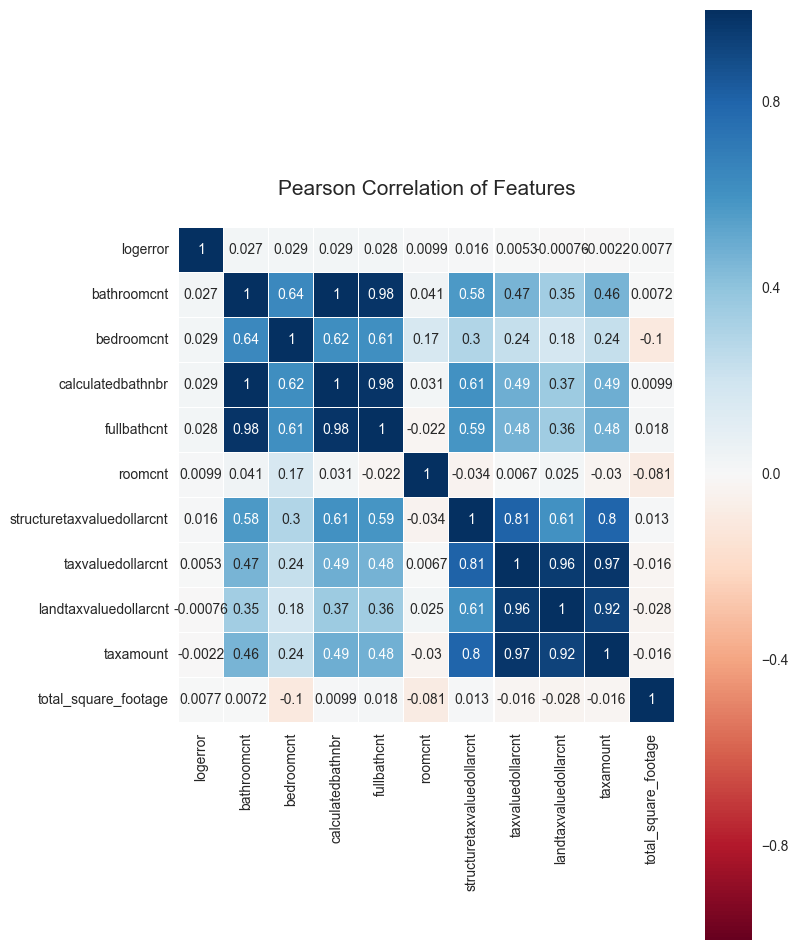

In [55]:
colormap = plt.cm.RdBu
plt.figure(figsize=(8,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.iloc[:,0:11].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)


print(train_df.iloc[:,0:11].describe())

more_columns_to_drop = []
more_columns_to_drop = ['fullbathcnt', 'calculatedbathnbr', 'landtaxvaluedollarcnt', 'structuretaxvaluedollarcnt']
  
train_df.drop(more_columns_to_drop, axis=1, inplace = True)
test_df.drop(more_columns_to_drop, axis=1, inplace = True)



colormap = plt.cm.RdBu
plt.figure(figsize=(8,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.iloc[:,0:7].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

C:\Users\203014767\.conda\envs\DAND\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


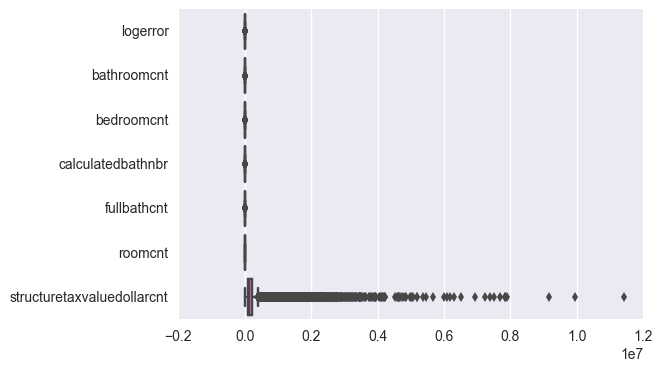

In [56]:
sns.boxplot(data = train_df.iloc[:,0:7], orient = 'h')

In [57]:
def outlier_removal(log_data):
    outlierSet = set()
    outliers_remove = set()

    # For each feature find the data points with extreme high or low values
    for feature in log_data.keys():

        # TODO: Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(log_data[feature], 25)

        # TODO: Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(log_data[feature], 75)

        # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3-Q1)*3
#http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/

        #Display the outliers
        print("Data points considered outliers for the feature '{}':".format(feature))
        display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

        outliers_df = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
        for i in outliers_df.index.values:

            if i not in outlierSet:
                outlierSet.add(i)
            else:
                outliers_remove.add(i)

    #OPTIONAL: Select the indices for data points you wish to remove
    outliers  = list(outliers_remove)
    print("Outliers in more than one set: \n")
    print(outliers)

        #Remove the outliers, if any were specified
    good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
    return good_data

In [58]:
outlier_removal(train_df.iloc[:,:1])

Data points considered outliers for the feature 'logerror':


,logerror
5,-0.270500
10,0.382500
93,-0.245900
102,-0.409500
121,0.335800
124,-0.636800
132,-0.427700
158,0.382500
184,-0.343900
212,0.494100


Outliers in more than one set: 

[36867, 41841, 28167, 2056, 72713, 57356, 22542, 11279, 53267, 20500, 22958, 23511, 75287, 47128, 5658, 4016, 73308, 60697, 36359, 43564, 48174, 50013, 77591, 5640, 7219, 57396, 15925, 51766, 1079, 8248, 42553, 41018, 58463, 72254, 49727, 34867, 58946, 61001, 6219, 67149, 75021, 11859, 58452, 75866, 62991, 11356, 21597, 42078, 11359, 36960, 75366, 43622, 15466, 39023, 13424, 7281, 27765, 26231, 15480, 50298, 34428, 52863, 7296, 34947, 69911, 76422, 9864, 57482, 44171, 53129, 3733, 40217, 37743, 9884, 17053, 158, 12447, 42657, 49318, 1703, 60512, 44714, 74407, 13998, 10415, 72881, 65715, 65310, 7867, 20158, 33397, 71872, 76823, 75973, 14856, 29899, 69836, 59086, 24013, 75472, 23160, 71378, 46397, 73081, 43737, 39373, 71388, 14557, 6367, 74976, 55009, 71395, 6372, 47569, 4476, 1770, 74962, 36079, 12019, 21237, 49910, 20215, 59645, 77253, 71936, 30848, 35115, 5591, 1805, 49423, 71811, 39702, 57561, 41240, 29465, 50479, 6430, 35616, 48929, 49442, 36131, 340

,logerror
0,0.027600
1,-0.168400
2,-0.004000
3,0.021800
4,-0.005000
5,-0.270500
6,0.044000
7,0.163800
8,-0.003000
9,0.084300


In [59]:
drop_column = ['logerror'] 
train_df.drop(drop_column, axis=1, inplace = True)

train_df_ohe_bins_no_categoricals = train_df.select_dtypes(exclude=['uint8'])
train_df_ohe_bins_no_categoricals = my_imputer.fit_transform(train_df_ohe_bins_no_categoricals)
cv_results = cross_val_score(RF_clf, train_df_ohe_bins_no_categoricals, y, cv=kfold, scoring=scoring)
msg = ("%f (%f)" % (cv_results.mean(), cv_results.std()))
print("Score without Categoricals")
print(msg)

train_df_ohe_bins = my_imputer.fit_transform(train_df)
cv_results = cross_val_score(RF_clf, train_df_ohe_bins, y, cv=kfold, scoring=scoring)
msg = ("%f (%f)" % (cv_results.mean(), cv_results.std()))
print("Score with Categoricals")
print(msg)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.33, random_state=42, shuffle = True)

In [65]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

In [72]:
from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)


#('int', SparseInteractions(degree=2))
#https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/features/SparseInteractions.py

Implement interaction modeling in scikit-learn
It's time to add interaction features to your model. The PolynomialFeatures object in scikit-learn does just that, but here you're going to a custom interaction object, SparseInteractions. Interaction terms are a statistical tool that lets your model express what happens if two features appear together in the same row.

SparseInteractions does the same thing as PolynomialFeatures, but it uses sparse matrices to do so. You can get the code for SparseInteractions at this GitHub Gist.

PolynomialFeatures and SparseInteractions both take the argument degree, which tells them what polynomia degree of interactions to compute.

In [80]:
#pipeline
num_attribs = list(train_df)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        #('poly', SparseInteractions(degree = 2)),
        ('std_scaler', scaler)
         ])
X_train_prepared = num_pipeline.fit_transform(X_train, y_train)

In [159]:
X_train_prepared = pd.DataFrame(X_train_prepared, columns = X_train.columns)

In [112]:
features = len(X_train.iloc[1])
print(features)

33


In [77]:
feature_dictionary = defaultdict(deque)

In [152]:
def train_predict(learner, columns, X_train, y_train, name):
    results = defaultdict(deque)
    results['Description'] = name
    
    estimators = []
    estimators.append(('selector', DataFrameSelector(columns)))
    estimators.append(('imputer', Imputer(strategy="median")))
    estimators.append(('std_scaler', scaler))
    #estimators.append(('feature_reduction', SelectKBest(k=features)))
    #estimators.append(('RF', RF_clf))
    
    pipeline = Pipeline(estimators)
    X_train_pipeline = pipeline.fit_transform(X_train[columns], y_train)
     
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train_pipeline, y_train)
    end = time() # Get end time

    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    start = time() # Get start time
    #predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train_pipeline)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first training samples
    results['mae_train'] = mean_absolute_error(y_train, predictions_train)
    
    # Return the results
    print(results)
    #feature_dictionary.append(results)
    for key, value in results.iteritems():
        feature_dictionary[key].append(value)
    feature_df = pd.DataFrame.from_dict(feature_dictionary, orient='columns', dtype='float64')  
    return feature_df
    

In [133]:
X_train_all_columns = X_train.columns.tolist()

In [134]:
train_predict(RF_clf, X_train_all_columns, X_train, y_train, 'base_case')

defaultdict(<type 'collections.deque'>, {u'train_time': 21.514000177383423, u'pred_time': 0.6089999675750732, u'Description': u'base_case', u'mae_train': 0.034721759560341868})


,Description,mae_train,pred_time,train_time
0,base_case,0.034730,0.553,19.659
1,low_p_value,0.034480,0.590,13.656
2,high_p_value,0.043891,0.448,3.885
3,skb_pipeline,0.034771,0.587,17.354
4,tree_pipeline,0.034865,0.656,17.694
5,lasso_pipeline,0.035489,0.568,6.110
6,base_case,0.034722,0.716,21.455
7,base_case,0.034722,0.674,37.037
8,base_case,0.034722,0.609,21.514


### Select K Best

In [148]:
skb.fit_transform(X_train_prepared, y_train)

array([[ 0.08333333,  0.125     ,  0.08333333, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.11111111,  0.1875    ,  0.11111111, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.11111111,  0.25      ,  0.11111111, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [ 0.05555556,  0.0625    ,  0.05555556, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.11111111,  0.125     ,  0.11111111, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05555556,  0.125     ,  0.05555556, ...,  1.        ,
         0.        ,  0.        ]])

In [136]:
# get the p values of columns
skb.pvalues_

# make a dataframe of features and p-values
# sort that dataframe by p-value
p_values = pd.DataFrame({'column': X_train.columns, 'p_value': skb.pvalues_}).sort_values('p_value')

#p_values.index.names = ['column']
# show the top 5 features
p_values.head(10)


,column,p_value
24,propertylandusetypeid_nan,0.000000e+00
6,taxvaluedollarcnt,0.000000e+00
7,landtaxvaluedollarcnt,0.000000e+00
8,taxamount,0.000000e+00
22,propertylandusetypeid_31.0,0.000000e+00
19,propertylandusetypeid_267.0,0.000000e+00
5,structuretaxvaluedollarcnt,1.313818e-299
21,propertylandusetypeid_275.0,1.971668e-299
15,propertylandusetypeid_263.0,1.154994e-143
12,propertylandusetypeid_248.0,3.937345e-64


In [145]:
# features with a low p value
low_p_values = p_values[p_values['p_value'] < .05]
low_p_value_columns = low_p_values["column"].tolist()
print(low_p_value_columns)


['propertylandusetypeid_nan', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'propertylandusetypeid_31.0', 'propertylandusetypeid_267.0', 'structuretaxvaluedollarcnt', 'propertylandusetypeid_275.0', 'propertylandusetypeid_263.0', 'propertylandusetypeid_248.0', 'propertylandusetypeid_247.0', 'propertylandusetypeid_246.0', 'propertylandusetypeid_265.0', 'yearbuilt_quantile_(1823.999, 1953.0]', 'calculatedbathnbr', 'fullbathcnt', 'bathroomcnt', u'quantile_bin_region_Fourth', 'bedroomcnt']


In [144]:
print(X_train_all_columns)

['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'fullbathcnt', 'roomcnt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', u'total_square_footage', 'propertylandusetypeid_246.0', 'propertylandusetypeid_247.0', 'propertylandusetypeid_248.0', 'propertylandusetypeid_260.0', 'propertylandusetypeid_261.0', 'propertylandusetypeid_263.0', 'propertylandusetypeid_264.0', 'propertylandusetypeid_265.0', 'propertylandusetypeid_266.0', 'propertylandusetypeid_267.0', 'propertylandusetypeid_269.0', 'propertylandusetypeid_275.0', 'propertylandusetypeid_31.0', 'propertylandusetypeid_47.0', 'propertylandusetypeid_nan', u'quantile_bin_region_First', u'quantile_bin_region_Second', u'quantile_bin_region_Third', u'quantile_bin_region_Fourth', 'yearbuilt_quantile_(1823.999, 1953.0]', 'yearbuilt_quantile_(1953.0, 1970.0]', 'yearbuilt_quantile_(1970.0, 1987.0]', 'yearbuilt_quantile_(1987.0, 2016.0]']


In [120]:
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns = X_train.columns)

In [121]:
features_low_p_value = len(X_train_prepared_df[low_p_values].iloc[1])
print(features_low_p_value)

19


In [153]:
train_predict(RF_clf,low_p_value_columns, X_train, y_train, 'low_p_value')

defaultdict(<type 'collections.deque'>, {u'train_time': 13.921000003814697, u'pred_time': 0.5759999752044678, u'Description': u'low_p_value', u'mae_train': 0.034480300586557808})


,Description,mae_train,pred_time,train_time
0,base_case,0.034730,0.553,19.659
1,low_p_value,0.034480,0.590,13.656
2,high_p_value,0.043891,0.448,3.885
3,skb_pipeline,0.034771,0.587,17.354
4,tree_pipeline,0.034865,0.656,17.694
5,lasso_pipeline,0.035489,0.568,6.110
6,base_case,0.034722,0.716,21.455
7,base_case,0.034722,0.674,37.037
8,base_case,0.034722,0.609,21.514
9,low_p_value,0.034480,0.576,13.921


In [155]:
# features with a high p value
high_p_values = p_values[p_values['p_value'] >= .05]
high_p_value_columns = high_p_values["column"].tolist()
print(high_p_value_columns)

['roomcnt', 'yearbuilt_quantile_(1987.0, 2016.0]', 'yearbuilt_quantile_(1953.0, 1970.0]', u'quantile_bin_region_Second', u'quantile_bin_region_Third', 'yearbuilt_quantile_(1970.0, 1987.0]', 'propertylandusetypeid_261.0', 'propertylandusetypeid_266.0', u'quantile_bin_region_First', 'propertylandusetypeid_269.0', 'propertylandusetypeid_260.0', u'total_square_footage', 'propertylandusetypeid_264.0']


In [157]:
train_predict(RF_clf, high_p_value_columns, X_train, y_train, 'high_p_value')

defaultdict(<type 'collections.deque'>, {u'train_time': 4.4079999923706055, u'pred_time': 0.5520000457763672, u'Description': u'high_p_value', u'mae_train': 0.043904474249010138})


,Description,mae_train,pred_time,train_time
0,base_case,0.034730,0.553,19.659
1,low_p_value,0.034480,0.590,13.656
2,high_p_value,0.043891,0.448,3.885
3,skb_pipeline,0.034771,0.587,17.354
4,tree_pipeline,0.034865,0.656,17.694
5,lasso_pipeline,0.035489,0.568,6.110
6,base_case,0.034722,0.716,21.455
7,base_case,0.034722,0.674,37.037
8,base_case,0.034722,0.609,21.514
9,low_p_value,0.034480,0.576,13.921


#pipeline
num_attribs = list(train_df)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', scaler),        
        ('KBest', SelectKBest(k = 10)),
        #('pca', PCA(n_components = 5)),
        ('reg', RF_clf)
         ])
param_distribs= dict(KBest__k = randint(low=1, high=37))
rnd_search = RandomizedSearchCV(num_pipeline, param_distributions=param_distribs,
                                n_iter=5, cv=kfold, scoring=scoring, random_state=42)

rnd_search_fit = rnd_search.fit(X_train, y_train)

#print(r_search_pca_skb.best_score_)
#print(r_search_pca_skb.best_estimator_)
print(rnd_search_fit.best_params_)

In [167]:
skb = SelectKBest(k=29)

In [ ]:
skb.fit_transform(X_train_prepared, y_train)

In [ ]:
mask = skb.get_support()
skb_columns = X_train_prepared.columns[mask].tolist()

In [ ]:
len(skb_columns)

In [ ]:
train_predict(RF_clf, skb_columns, X_train, y_train, 'skb_pipeline')

The biggest difference in usage between SelectFromModel and SelectKBest is that SelectFromModel doesn't take in an integer k, which represents the number of features to keep, but rather SelectFromModel uses a threshold for selection which acts as a hard minimum of importance to be selected. In this way, the model-based selectors of this chapter are able to move away from a human-inputted number of features to keep and instead rely on relative importance to include only as many features as the pipeline needs. Let's instantiate our class as follows:

In [94]:
RF_clf.fit(X_train_prepared, y_train)
important_features = pd.Series(data=RF_clf.feature_importances_,index=train_df.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)
#https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances

total_square_footage                     0.190221
taxamount                                0.166665
structuretaxvaluedollarcnt               0.161374
landtaxvaluedollarcnt                    0.153212
taxvaluedollarcnt                        0.136532
bedroomcnt                               0.028533
roomcnt                                  0.022674
bathroomcnt                              0.014399
quantile_bin_region_Second               0.013905
quantile_bin_region_Third                0.013788
calculatedbathnbr                        0.013649
quantile_bin_region_Fourth               0.012304
quantile_bin_region_First                0.010696
yearbuilt_quantile_(1953.0, 1970.0]      0.008672
fullbathcnt                              0.008401
yearbuilt_quantile_(1823.999, 1953.0]    0.008037
yearbuilt_quantile_(1970.0, 1987.0]      0.006371
yearbuilt_quantile_(1987.0, 2016.0]      0.006315
propertylandusetypeid_246.0              0.005604
propertylandusetypeid_261.0              0.004726


In [95]:
select = SelectFromModel(RF_clf, threshold=.05)

In [ ]:
select.fit(X_train_prepared, y_train)

#pipeline
num_attribs = list(train_df)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', scaler),
        ('select', select),
        #('KBest', SelectKBest(k = 10)),
        #('pca', PCA(n_components = 5)),
        ('reg', RF_clf)
         ])
params= ({'select__threshold': ["mean", "median"] })
grid = GridSearchCV(num_pipeline, param_grid=params, cv=kfold, scoring = scoring)


grid.fit(X_train, y_train)

print(grid.best_params_)

In [96]:
num_pipeline_tree = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', scaler),
        ('select', SelectFromModel(RF_clf, threshold="median"))
        #('KBest', SelectKBest(k = 10)),
        #('pca', PCA(n_components = 5)),
        #('reg', RF_clf)
         ])

In [97]:
X_train_prepared_tree = num_pipeline_tree.fit_transform(X_train, y_train)

In [98]:
train_predict(RF_clf, X_train_prepared_tree, y_train, 'tree_pipeline')

defaultdict(<type 'collections.deque'>, {u'train_time': 17.694000005722046, u'pred_time': 0.6559998989105225, u'Description': u'tree_pipeline', u'mae_train': 0.034864651242719931})


,Description,mae_train,pred_time,train_time
0,base_case,0.034730,0.553,19.659
1,low_p_value,0.034480,0.590,13.656
2,high_p_value,0.043891,0.448,3.885
3,skb_pipeline,0.034771,0.587,17.354
4,tree_pipeline,0.034865,0.656,17.694


In [99]:
select_lasso = SelectFromModel(LassoCV(), threshold=0.25)

#pipeline
num_attribs = list(train_df)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', scaler),
        ('select', select_lasso),
        #('KBest', SelectKBest(k = 10)),
        #('pca', PCA(n_components = 5)),
        ('reg', RF_clf)
         ])
params= ({'select__threshold': ["median", "mean"] })
grid = GridSearchCV(num_pipeline, param_grid=params, cv=kfold, scoring = scoring)


grid.fit(X_train, y_train)

print(grid.best_params_)

In [100]:
num_attribs = list(train_df)

num_pipeline_lasso = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', scaler),
        ('select', SelectFromModel(LassoCV(), threshold="mean"))])


In [101]:
X_train_prepared_lasso = num_pipeline_lasso.fit_transform(X_train, y_train)

In [102]:
train_predict(RF_clf, X_train_prepared_lasso, y_train, 'lasso_pipeline')

defaultdict(<type 'collections.deque'>, {u'train_time': 6.109999895095825, u'pred_time': 0.568000078201294, u'Description': u'lasso_pipeline', u'mae_train': 0.03548862842001322})


,Description,mae_train,pred_time,train_time
0,base_case,0.034730,0.553,19.659
1,low_p_value,0.034480,0.590,13.656
2,high_p_value,0.043891,0.448,3.885
3,skb_pipeline,0.034771,0.587,17.354
4,tree_pipeline,0.034865,0.656,17.694
5,lasso_pipeline,0.035489,0.568,6.110


# Sanity Checkhigh_p_values_X_train_prepared

a# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
#estimators.append(('clf', LASSO_clf))
pipeline = Pipeline(estimators)
param_grid = {
    'feature_union__pca__n_components': randint(low=2, high=10),
    'feature_union__select_best__k': randint(low=2, high=15)
        }
r_search_pca_skb = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=4,random_state=7, 
                                      scoring = scoring, cv = kfold)
r_search_pca_skb.fit(train_df_imp, y)
#print(r_search_pca_skb.best_score_)
#print(r_search_pca_skb.best_estimator_)
print(r_search_pca_skb.best_params_)

Feature selection processes are limited to only being able to select features from the original set of columns, while feature transformation algorithms use these original columns and combine them in useful ways to create new columns that are better at describing the data than any single column from the original dataset. Therefore, feature selection methods reduce dimensions by isolating signal columns and ignoring noise columns.

Feature transformation methods create new columns using hidden structures in the original datasets to produce an entirely new, structurally different dataset. These algorithms create brand new columns that are so powerful that we only need a few of them to explain our entire dataset accurately.

Feature construction is again limited to constructing new columns using simple operations (addition, multiplication, and so on) between a few columns at a time. This implies that any constructed features using classical feature construction are constructed using only a few columns from the original dataset at a time.

Feature transformation methods are able to utilize small bits of information from all columns in every new super-column, so we do not need to create an inordinate amount of new columns to capture latent feature interactions. Due to the nature of feature transformation algorithms and its use of matrixes/linear algebra, feature transformation methods never create more columns than we start with, and are still able to extract the latent structure that features construction columns attempt to extract.

Feature transformation algorithms are able to construct new features by selecting the best of all columns and combining this latent structure with a few brand new columns.

Principal Component Analysis is a technique that takes datasets that have several correlated features and projects them onto a coordinate (axis) system that has fewer correlated features. 

Principal components are ordered by variance explained so that the first principal component does the most to explain the variance of the data, while the second component does the second most to explain the variance of the data. The goal is to utilize as many components as we need in order to optimize the machine learning task, whether it be supervised or unsupervised learning:

https://www.safaribooksonline.com/library/view/feature-engineering-made/9781787287600/705224d8-3826-4688-a716-5c3d3d64879a.xhtml

#pipeline
num_attribs = list(train_df)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', scaler),        
        ('KBest', SelectKBest(k = 10)),
        ('pca', PCA(n_components = 5)),
        ('reg', RF_clf)
         ])

param_distribs = {
    'KBest__k' : randint(low=1, high=39),
    'pca__n_components' : randint(low=1, high=10),
    #'reg__min_samples_split': randint(low=1, high=100)
    }

rnd_search = RandomizedSearchCV(num_pipeline, param_distributions=param_distribs,
                                n_iter=10, cv=kfold, scoring=scoring, random_state=42)


#pipeline
num_attribs = list(train_df)
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', scaler), 
        ('feature_union', feature_union),
        #('KBest', SelectKBest(k = 10)),
        #('pca', PCA(n_components = 5)),
        ('reg', RF_clf)
         ])

param_distribs = {
    'feature_union__pca__n_components': randint(low=2, high=10),
    'feature_union__select_best__k': randint(low=2, high=20)
    #'reg__min_samples_split': randint(low=1, high=100)
    }

rnd_search = RandomizedSearchCV(num_pipeline, param_distributions=param_distribs,
                                n_iter=10, cv=kfold, scoring=scoring, random_state=42)

rnd_search_fit = rnd_search.fit(X_train, y_train)

print(rnd_search_fit.best_params_)

#title = "Learning Curves (GB UnTuned)"
#plot_learning_curve(GB_clf, title, X_train_prepared, y_train, cv=kfold)

title = "Learning Curves (LASSO Tuned)"
plot_learning_curve(LASSO_clf_tuned, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (MLP Untuned)"
plot_learning_curve(keras_clf, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (RF Tuned)"
plot_learning_curve(RF_clf_tuned, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (GB Tuned)"
plot_learning_curve(GB_clf_tuned, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (Stacking)"
plot_learning_curve(stregr_clf, title, X_train_final, y_train, cv=kfold)
#title = "Learning Curves (Voting Tuned)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#plot_learning_curve(voting_ensemble, title, X_train_scaled, y_train, cv=sss, n_jobs=1)

#title = "Learning Curves (GB UnTuned)"
#plot_learning_curve(GB_clf, title, X_train_prepared, y_train, cv=kfold)

title = "Learning Curves (LASSO Tuned)"
plot_learning_curve(LASSO_clf_tuned, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (MLP Untuned)"
plot_learning_curve(keras_clf, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (RF Tuned)"
plot_learning_curve(RF_clf_tuned, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (GB Tuned)"
plot_learning_curve(GB_clf_tuned, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (Stacking)"
plot_learning_curve(stregr_clf, title, X_train_final, y_train, cv=kfold)
#title = "Learning Curves (Voting Tuned)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#plot_learning_curve(voting_ensemble, title, X_train_scaled, y_train, cv=sss, n_jobs=1)

#title = "Learning Curves (GB UnTuned)"
#plot_learning_curve(GB_clf, title, X_train_prepared, y_train, cv=kfold)

title = "Learning Curves (LASSO Tuned)"
plot_learning_curve(LASSO_clf_tuned, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (MLP Untuned)"
plot_learning_curve(keras_clf, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (RF Tuned)"
plot_learning_curve(RF_clf_tuned, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (GB Tuned)"
plot_learning_curve(GB_clf_tuned, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (Stacking)"
plot_learning_curve(stregr_clf, title, X_train_final, y_train, cv=kfold)
#title = "Learning Curves (Voting Tuned)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#plot_learning_curve(voting_ensemble, title, X_train_scaled, y_train, cv=sss, n_jobs=1)

train_df_imp = my_imputer.fit_transform(train_df)
train_df_scaled = scaler.fit_transform(train_df_imp)

k_best = SelectKBest(chi2, k=10)
X_train_skb = k_best.fit_transform(X_train_imp, y_train)

pca = PCA(n_components=.8)
X_train_final = pca.fit_transform(X_train_scaled)

pca.explained_variance_ratio_

regionid seems more important than zip for a location category so let's drop the zipcode

important_features = pd.DataFrame({'Importance' :important_features})
important_features
important_features_remove = important_features[important_features.Importance == 0]
important_features_remove

columns_to_remove = []
columns_to_remove = important_features_remove.index.values.tolist()

    imputer
    feature reduction
    ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))

To retain enough components to cover 80% of the total variance in the data, pick k such that StartFraction normal upper Sigma Subscript i equals 1 Superscript k Baseline sigma Subscript i Superscript 2 Baseline Over normal upper Sigma Subscript i equals 1 Superscript d Baseline sigma Subscript i Superscript 2 Baseline EndFraction greater-than-or-equal-to .8
https://www.safaribooksonline.com/library/view/feature-engineering-for/9781491953235/ch06.html

#Partial Dependence Plots

https://stats.stackexchange.com/questions/94902/how-to-represent-geography-or-zip-code-in-machine-learning-model-or-recommender
#https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature
#https://datascience.stackexchange.com/questions/761/clustering-geo-location-coordinates-lat-long-pairs
#https://www.kdnuggets.com/2016/08/include-high-cardinality-attributes-predictive-model.html

Great information from feature importance.  
1.  I can eliminate for features that have a 0 importance, so that helps thin the data set.  
2. I can create a calculated field that adds together the lot size with the finished square feet.  finishedsquarefeet12  has 5% NA and appears to be a duplicate to calculatedfinishedsquarefeet so I will drop it.  
3. The rule in real estate is 'Location, Location, Location'.  Therefore, I can combine latitude, longitude, and other location info
4. Taxes do matter because this is a fixed cost of living in the home
5. The year built matters also as older homes may need renovation.

sns.distplot(train_df['logerror'] , fit=norm);
(mu, sigma) = norm.fit(train_df['logerror'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Logerror distribution')

#QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['logerror'], plot=plt)
plt.show()
#https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
#http://data.library.virginia.edu/understanding-q-q-plots/

The qplot shows that the logerror has a 'heavy tails' distribution.  Let's see if this changes after we remove outlier's from logerror.

drop_column2 = ['logerror', 'transactiondate'] 
train_df.drop(drop_column2, axis=1, inplace = True)


# Let's remove the top and bottom 5% of outliers
outlier_upper = np.percentile(train_df.logerror.values, 95)
outlier_lower = np.percentile(train_df.logerror.values, 5)
train_df['logerror'].ix[train_df['logerror']>outlier_upper] = outlier_upper
train_df['logerror'].ix[train_df['logerror']<outlier_lower] = outlier_lower

num = train_df.select_dtypes(exclude=[object])
num = num.columns.get_values()
num.tolist()

cat = train_df.select_dtypes(include=[object])
cat = cat.columns.get_values()
cat.tolist()

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

train_df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

# Print the summary statistics for income
#print(income.describe())

# Plot a basic histogram of income per capita
sns.distplot(train_df['logerror'],hist=True, kde = True)

# Show the plot
plt.show()

# Plot a rugplot
#sns.distplot(train_df['logerror'], kde = True, rug = False)

# Show the plot
#plt.show()

# Create boxplot
sns.boxplot(x='logerror', data=train_df)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create swarmplot
sns.swarmplot(x='logerror', data=train_df)

# Show the plot
plt.show()

### Prepare the data for Machine Learning algorithms

X_train, X_test, y_train, y_test = train_test_split = \
    train_test_split(train_df, y, test_size=0.3, random_state=42)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
#estimators.append(('clf', LASSO_clf))
pipeline = Pipeline(estimators)
param_grid = {
    'feature_union__pca__n_components': randint(low=2, high=10),
    'feature_union__select_best__k': randint(low=2, high=15)
        }
r_search_pca_skb = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=4,random_state=7, 
                                      scoring = scoring, cv = kfold)
r_search_pca_skb.fit(X_train_scaled, y_train)
#print(r_search_pca_skb.best_score_)
#print(r_search_pca_skb.best_estimator_)
print(r_search_pca_skb.best_params_)

# Tune scaled KNN
#neighbors = [1,2,3,4,5,7,8,9,10]
param_grid = dict(n_neighbors=randint(low = 2, high = 10))
rsearch = RandomizedSearchCV(KNN_clf, param_distributions=param_grid, n_iter=4,random_state=7, 
                                      scoring = scoring, cv = kfold)
rsearch_result = rsearch.fit(X_train_prepared, y_train)
print("Best: %f using %s" % (rsearch_result.best_score_, rsearch_result.best_params_))
KNN_clf_tuned = rsearch.best_estimator_

params = {'RF_clf__max_depth' : randint(low=1, high=5),
          'RF_clf__min_samples_split': randint(low=2, high=5),
          'RF_clf__n_estimators' : randint(low=100, high=200),
          'ridge__alpha': [0.1, 1.0, 10.0],
          'svr__C': [0.1, 1.0, 10.0],
          'meta-svr__C': [0.1, 1.0, 10.0, 100.0],
          'meta-svr__gamma': [0.1, 1.0, 10.0]}

grid = GridSearchCV(estimator=stregr, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X, y)

for params, mean_score, scores in grid.grid_scores_:
        print("%0.3f +/- %0.2f %r"
              % (mean_score, scores.std() / 2.0, params))

#Tune RF
param_grid = {
    'max_depth' : randint(low=1, high=5),
    'min_samples_split': randint(low=2, high=5),
    'n_estimators' : randint(low=100, high=200) }

rsearch = RandomizedSearchCV(RF_clf, param_distributions=param_grid, n_iter=4, cv = kfold, 
                             random_state=7, scoring = scoring)
rsearch_result = rsearch.fit(X_train_prepared, y_train)
#print(rsearch.best_score_)
#print(rsearch.best_estimator_)
#print(rsearch.best_params_)

print("Best: %f using %s" % (rsearch_result.best_score_, rsearch_result.best_params_))
RF_clf_tuned = rsearch_result.best_estimator_

# Tune GB - First tune number of Trees
param_grid = {
    'max_depth' : randint(low=1, high=5),
    'n_estimators' : randint(low=100, high=400) }

rsearch = RandomizedSearchCV(GB_clf, param_distributions=param_grid, n_iter=5, cv = kfold, 
                             random_state=7, scoring = scoring)
rsearch_result = rsearch.fit(X_train_prepared, y_train)
#print(rsearch.best_score_)
#print(rsearch.best_estimator_)
#print(rsearch.best_params_)

print("Best: %f using %s" % (rsearch_result.best_score_, rsearch_result.best_params_))
GB_clf_tuned = rsearch_result.best_estimator_

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

alphas = [0,5,10,20]
cv_ridge = [cross_val_score(Ridge(alpha = alpha), X_train_imp, y_train, cv=kfold, scoring=scoring).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Alpha Tuning - Ridge")
plt.xlabel("alpha")
plt.ylabel("mse")

cv_ridge.min()

Let' try out the Lasso model. We will do a slightly different approach here and use the built in Lasso CV to figure out the best alpha for us. For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge.

alphas = [0.8,0.9,0.1,0.11,1]
lasso_ridge = [cross_val_score(Lasso(alpha = alpha), X_train_imp, y_train, cv=kfold, scoring=scoring).mean() 
            for alpha in alphas]

lasso_ridge = pd.Series(lasso_ridge, index = alphas)
lasso_ridge.plot(title = "Alpha Tuning - Lasso")
plt.xlabel("alpha")
plt.ylabel("mse")

lasso_ridge.min()

param_grid = {'learning_rate' : uniform(0.01,0.3), #(2 to 10)/trees
#'clf__min_child_weight': uniform(), # 3 / sqrt(rare events)             
'max_depth': [2],#randint(low=6, high=12),
'subsample': [1.0],#row sampling              
#'clf__colsample_bytree':[0.3, 0.4, 0.5],
'n_estimators' : [285] }


rsearch = RandomizedSearchCV(GB_clf, param_distributions=param_grid, n_iter=7, cv = kfold, 
                             scoring = scoring)

rsearch_result = rsearch.fit(X_train_prepared, y_train)
print("Best: %f using %s" % (rsearch_result.best_score_, rsearch_result.best_params_))
GB_clf_tuned = rsearch_result.best_estimator_

models = []
models.append(('LR', LR_clf))
models.append(('Lasso', LASSO_clf))
models.append(('KNN', KNN_clf))
models.append(('RF',RF_clf))
models.append(('GB', GB_clf))

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train_imp, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# scaled/pca/skb
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', scaler),("feature_union",feature_union),('LR',LR_clf)])))
pipelines.append(('Lasso', Pipeline([('Scaler', scaler),("feature_union",feature_union),('Lasso',LASSO_clf)])))
pipelines.append(('KNN', Pipeline([('Scaler', scaler),("feature_union",feature_union),('KNN',KNN_clf)])))
pipelines.append(('RF', Pipeline([('Scaler', scaler),("feature_union",feature_union),('RF',RF_clf)])))
pipelines.append(('GB', Pipeline([('Scaler', scaler),("feature_union",feature_union),('GB', GB_clf)])))

results_pca_tuned = []
names_pca_tuned = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results_pca_tuned.append(cv_results)
    names_pca_tuned.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LASSO_clf_tuned.fit(X_train_prepared, y_train)
keras_clf.fit(X_train_prepared, y_train)
RF_clf_tuned.fit(X_train_prepared, y_train)
GB_clf_tuned.fit(X_train_prepared, y_train)


# scaled/pca/skb/tuned
pipelines = []
#pipelines.append(('LR', Pipeline([('Scaler', scaler),("feature_union",feature_union),('LR',LR_clf)])))
pipelines.append(('Lasso', Pipeline([('Scaler', scaler),("pca",PCA(n_components=0.8)),('Lasso',LASSO_clf_tuned)])))
pipelines.append(('MLP', Pipeline([('Scaler', scaler),("pca",PCA(n_components=0.8)),('MLP',keras_clf)])))
#pipelines.append(('KNN', Pipeline([('Scaler', scaler),("feature_union",feature_union),('KNN',KNN_clf_tuned)])))
pipelines.append(('RF', Pipeline([('Scaler', scaler), ("pca",PCA(n_components=0.8)),('RF',RF_clf_tuned)])))
pipelines.append(('GB', Pipeline([('Scaler', scaler),("pca",PCA(n_components=0.8)),('GB', GB_clf_tuned)])))
pipelines.append(('stacking', Pipeline([('Scaler', scaler),("pca",PCA(n_components=0.8)),('stacking', stregr_clf)])))
#pipelines.append(('GB', Pipeline([('Scaler', scaler),("feature_union",feature_union),('GB', GB_clf)])))
                                  

results_pca_tuned = []
names_pca_tuned = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train_imp, y_train, cv=kfold, scoring=scoring)
    results_pca_tuned.append(cv_results)
    names_pca_tuned.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Compare Algorithms
fig_pca_tuned = plt.figure()
fig_pca_tuned.suptitle('PCA_SKB Algorithm Comparison')
ax = fig_pca_tuned.add_subplot(111)
plt.boxplot(results_pca_tuned)
ax.set_xticklabels(names_pca_tuned)
plt.show()

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

I found using the stacking regressor from mlxtend.regressor much easier than writing a class to weight algorithms. It's pretty cool how it works. Would love some other feedback on stacking. I was disappointed to learn the sklearn has the ability to ensemble algorithms by voting but it is only available for classification algorithms.

#title = "Learning Curves (LR Untuned)"
#plot_learning_curve(LR_clf, title, X_train_prepared, y_train, cv=kfold)

title = "Learning Curves (LASSO Tuned)"
plot_learning_curve(LASSO_clf_tuned, title, X_train_prepared, y_train, cv=kfold)

title = "Learning Curves (MLP Untuned)"
plot_learning_curve(keras_clf, title, X_train_prepared, y_train, cv=kfold)

#title = "Learning Curves (GB UnTuned)"
#plot_learning_curve(GB_clf, title, X_train_prepared, y_train, cv=kfold)

title = "Learning Curves (LASSO Tuned)"
plot_learning_curve(LASSO_clf_tuned, title, X_train_final, y_train, cv=kfold)

#title = "Learning Curves (MLP Untuned)"
#plot_learning_curve(keras_clf, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (RF Tuned)"
plot_learning_curve(RF_clf_tuned, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (GB Tuned)"
plot_learning_curve(GB_clf_tuned, title, X_train_final, y_train, cv=kfold)

title = "Learning Curves (Stacking)"
plot_learning_curve(stregr_clf, title, X_train_final, y_train, cv=kfold)
#title = "Learning Curves (Voting Tuned)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#plot_learning_curve(voting_ensemble, title, X_train_scaled, y_train, cv=sss, n_jobs=1)

### Final Predictions

RF_clf_tuned.fit(X_train_prepared, y_train)
pred = RF_clf_tuned.predict(X_test_prepared)
MAE_test = mean_absolute_error(pred, y_test)

print ("MAE Test: {}".format(MAE_test))

GB_clf_tuned.fit(X_train_prepared, y_train)
pred = GB_clf_tuned.predict(X_test_prepared)
MAE_test = mean_absolute_error(pred, y_test)

print ("MAE Test: {}".format(MAE_test))

LASSO_clf.fit(X_train_prepared, y_train)
pred = LASSO_clf.predict(X_test_prepared)
MAE_test = mean_absolute_error(pred, y_test)

print ("MAE Test: {}".format(MAE_test))

voting_ensemble.fit(X_train_prepared, y_train)
pred = voting_ensemble.predict(X_test_prepared)
MAE_test = mean_absolute_error(pred, y_test)

print ("MAE Test: {}".format(MAE_test))

# Run final predictions
final_pipeline = Pipeline([
    ('preparation', prep_pipeline),
    ('stacking_reg', stregr_clf)
])


print(len(test_df))

final_model = final_pipeline.fit(train_df, y)

# Run final predictions
pred_final = final_model.predict(test_df)

print(len(test_df))

len(pred_final)

submission_file = pd.read_csv('../input/sample_submission.csv') 

len(submission_file)


for column in submission_file.columns[submission_file.columns != 'ParcelId']:
    submission_file[column] = pred_final

submission_file.to_csv('RF_final_predictions.csv', index=False, float_format='%.4f')